# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from read_data import combine_all, combine_category, read_data

In [3]:
from wordcloud import WordCloud
import itertools

In [4]:
from cleantext import clean
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
from collections import Counter

# Read Dataset

### Read Sentiment Dataset

In [6]:
sentiment_dataset = pd.read_csv('dataset.csv')
sentiment_dataset.dropna(inplace=True)
sentiment_dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

### Read Mr Beast Dataset

In [7]:
mr_beast = combine_category(mr_beast=True)

### Read Mr Beast Gamming Dataset

In [8]:
mr_beast_gaming = combine_category(mr_beast_gaming=True)

### Mr Beast Most Popular Video

In [9]:
squid_game = read_data('0e3GPea1Tyg.csv')
squid_game.dropna(inplace=True)

### Mr Beast Gamming Most Poplular Video

In [10]:
pay_for = read_data('QsUfsZzxi9c.csv')
pay_for.dropna(inplace=True)

### Dataset for Mr Beat Squad and First Comment Analysis

In [11]:
burried = read_data('9bqk6ZUsKyA.csv')
golden = read_data('F4Y3Pkn95GI.csv')

burried.dropna(inplace=True)
golden.dropna(inplace=True)

C:\Users\Eashan\Desktop\youtube-comment-analysis\analysis\read_data.py:77: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join("mr_beast", name))


# Word Cloud - General

In [12]:
sentiment_dataset.head()

,Comment,neg,neu,pos,compound,Sentiment
0,chris watching them eat food why are we still ...,0.127,0.873,0.0,-0.5423,Negative
2,a,0.000,0.000,0.0,0.0000,Neutral
3,noted,0.000,1.000,0.0,0.0000,Neutral
4,cuando en espanol,0.000,1.000,0.0,0.0000,Neutral
5,primero,0.000,1.000,0.0,0.0000,Neutral


In [13]:
final_comment = ''

for comment in sentiment_dataset.Comment:
    final_comment += comment

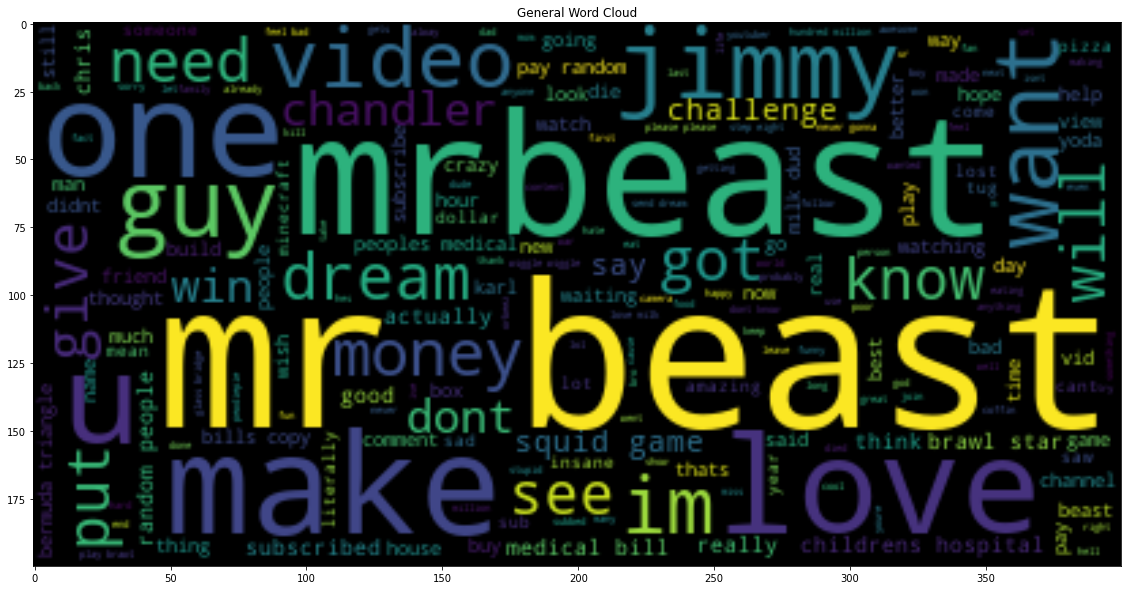

In [14]:
fig, axis = plt.subplots(1, 1, figsize=(20,10))
wordcloud = WordCloud().generate(final_comment)

plt.imshow(wordcloud, interpolation="bilinear")
plt.title('General Word Cloud')
plt.show()
fig.savefig('wordcloud.png')

# Mr Beast Channel vs Mr Beast Gaming Channel

In [15]:
mr_beast.head()

,Name,Comment,Time,Likes,Reply Count\r,Reply Count
0,MrBeast,"Like I said in the video, subscribe if you hav...",2021-11-24T21:02:45Z,860124,411.0,NaN
1,Natanael De La Torre,IRL:squid game already IRL,2022-04-03T01:26:06Z,0,0.0,NaN
2,Rexx2Byte,4:39 EYYYYYYY WASSUP NIGHT FOX,2022-04-03T01:19:41Z,1,0.0,NaN
3,HK KING868,After reject Netflix,2022-04-03T01:06:44Z,0,0.0,NaN
4,Dragon Walker,some people just made the marbles game so conf...,2022-04-03T01:06:41Z,1,0.0,NaN


In [16]:
mr_beast_gaming.head()

,Name,Comment,Time,Likes,Reply Count\r,Reply Count
0,Rick Hale,The money was green stripped to,2022-04-03T00:30:14Z,0,0.0,NaN
1,Nivia Thomas,My mom and my grandma like milk duds lol,2022-04-03T00:00:09Z,0,0.0,NaN
2,samanhosuke,Me: and the challenge \nJimmy: says if you los...,2022-04-02T23:58:03Z,0,0.0,NaN
3,samanhosuke,Jimmy: no one likes milk duds \n Me: excuse ...,2022-04-02T23:54:29Z,0,0.0,NaN
4,Catherine Grodensky,Are you going to the moon,2022-04-02T23:35:19Z,0,0.0,NaN


In [17]:
def get_sentiment(df):
    df["Comment"]=df["Comment"].astype(str)
    def classify(compound):
        if compound > 0:
            return 'Positive'
        elif compound == 0:
            return 'Neutral'
        else:
            return 'Negative'
        
    sentid = SentimentIntensityAnalyzer()
    df["sentiments"] = df["Comment"].apply(lambda x:sentid.polarity_scores(x))
    df = pd.concat([df.drop(["sentiments"],axis=1),df["sentiments"].apply(pd.Series)],axis=1)
    df['Sentiment'] = df['compound'].apply(classify)
    
    return df

In [18]:
# mr_beast_sentiment = get_sentiment(mr_beast)

In [19]:
# mr_beast_gaming_sentiment = get_sentiment(mr_beast_gaming)

In [20]:
# mr_beast_sentiment.to_csv('mr_beast_sentiment.csv')
# mr_beast_gaming_sentiment.to_csv('mr_beast_gaming_sentiment.csv')

In [21]:
mr_beast_sentiment = pd.read_csv('mr_beast_sentiment.csv')
mr_beast_gaming_sentiment = pd.read_csv('mr_beast_gaming_sentiment.csv')

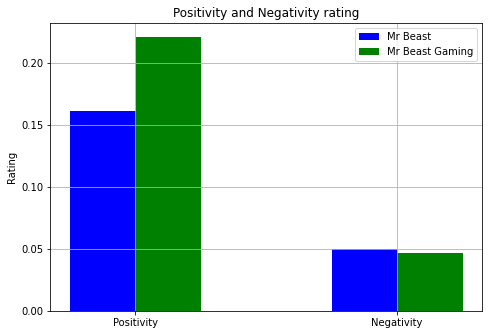

In [22]:
data = [
    [mr_beast_sentiment['pos'].mean(), mr_beast_sentiment['neg'].mean()],
    [mr_beast_gaming_sentiment['pos'].mean(), mr_beast_gaming_sentiment['neg'].mean()]
       ]

X = np.arange(2)
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='Mr Beast')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='Mr Beast Gaming')

ax.set_ylabel('Rating')
ax.set_title('Positivity and Negativity rating')
ax.set_xticks([0.124, 1.124], ('Positivity', 'Negativity'))

plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [23]:
total_mr_beast = mr_beast_sentiment.Comment.count()
total_mr_beast_gaming = mr_beast_gaming_sentiment.Comment.count()

In [24]:
positve_mr_beast = mr_beast_sentiment[mr_beast_sentiment.Sentiment == 'Positive'].Comment.count() / total_mr_beast
negative_mr_beast = mr_beast_sentiment[mr_beast_sentiment.Sentiment == 'Negative'].Comment.count() / total_mr_beast
neutral_mr_beast = mr_beast_sentiment[mr_beast_sentiment.Sentiment == 'Neutral'].Comment.count() / total_mr_beast

positve_mr_beast_gaming = mr_beast_gaming_sentiment[mr_beast_gaming_sentiment.Sentiment == 'Positive'].Comment.count() / total_mr_beast_gaming
negative_mr_beast_gaming = mr_beast_gaming_sentiment[mr_beast_gaming_sentiment.Sentiment == 'Negative'].Comment.count() / total_mr_beast_gaming
neutral_mr_beast_gaming = mr_beast_gaming_sentiment[mr_beast_gaming_sentiment.Sentiment == 'Neutral'].Comment.count() / total_mr_beast_gaming

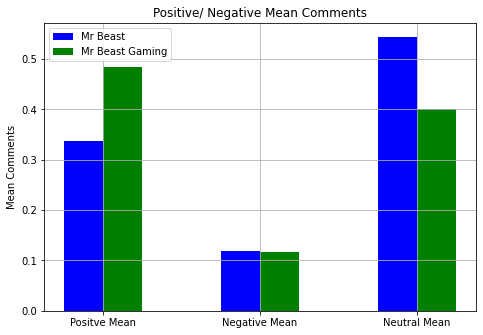

In [25]:
data = [
    [positve_mr_beast, negative_mr_beast, neutral_mr_beast],
    [positve_mr_beast_gaming, negative_mr_beast_gaming, neutral_mr_beast_gaming],
       ]

X = np.arange(3)
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='Mr Beast')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='Mr Beast Gaming')

ax.set_ylabel('Mean Comments')
ax.set_title('Positive/ Negative Mean Comments')
ax.set_xticks([0.124, 1.124, 2.124], ('Positve Mean', 'Negative Mean', 'Neutral Mean'))

plt.legend(loc="upper left")
plt.grid(True)
plt.show()

# Word Cloud - Sentiment

In [33]:
positive_comment = ''

for comment in mr_beast_sentiment[mr_beast_sentiment.Sentiment == 'Positive'].Comment:
    positive_comment += ' ' + comment

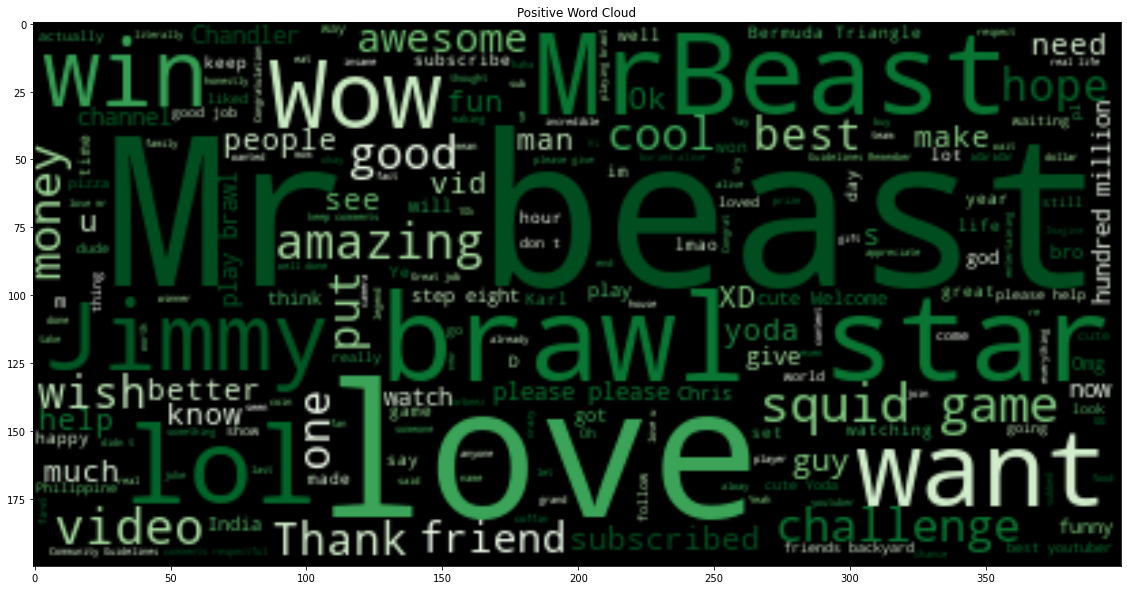

In [32]:
fig, axis = plt.subplots(1, 1, figsize=(20,10))
wordcloud = WordCloud(colormap="Greens").generate(positive_comment)

plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Positive Word Cloud')
plt.show()
fig.savefig('wordcloud-positive.png')

In [34]:
negative_comment = ''

for comment in mr_beast_sentiment[mr_beast_sentiment.Sentiment == 'Negative'].Comment:
    negative_comment += ' ' + comment

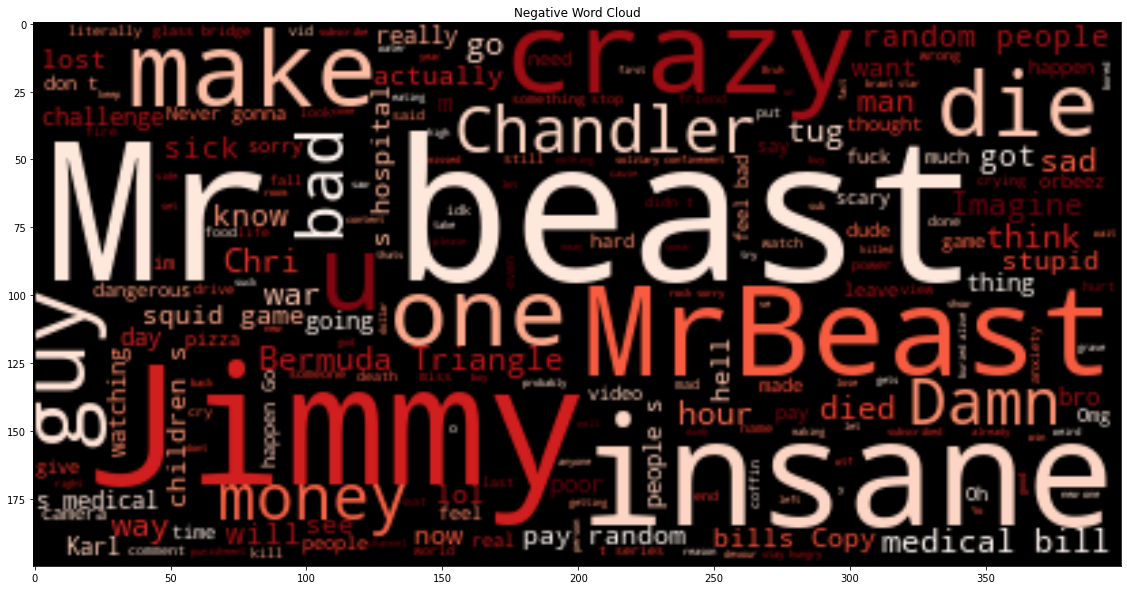

In [35]:
fig, axis = plt.subplots(1, 1, figsize=(20,10))
wordcloud = WordCloud(colormap="Reds").generate(negative_comment)

plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Negative Word Cloud')
plt.show()
fig.savefig('wordcloud-negative.png')

In [36]:
neutral_comment = ''

for comment in mr_beast_sentiment[mr_beast_sentiment.Sentiment == 'Neutral'].Comment:
    if isinstance(comment, str):
        neutral_comment += ' ' + comment

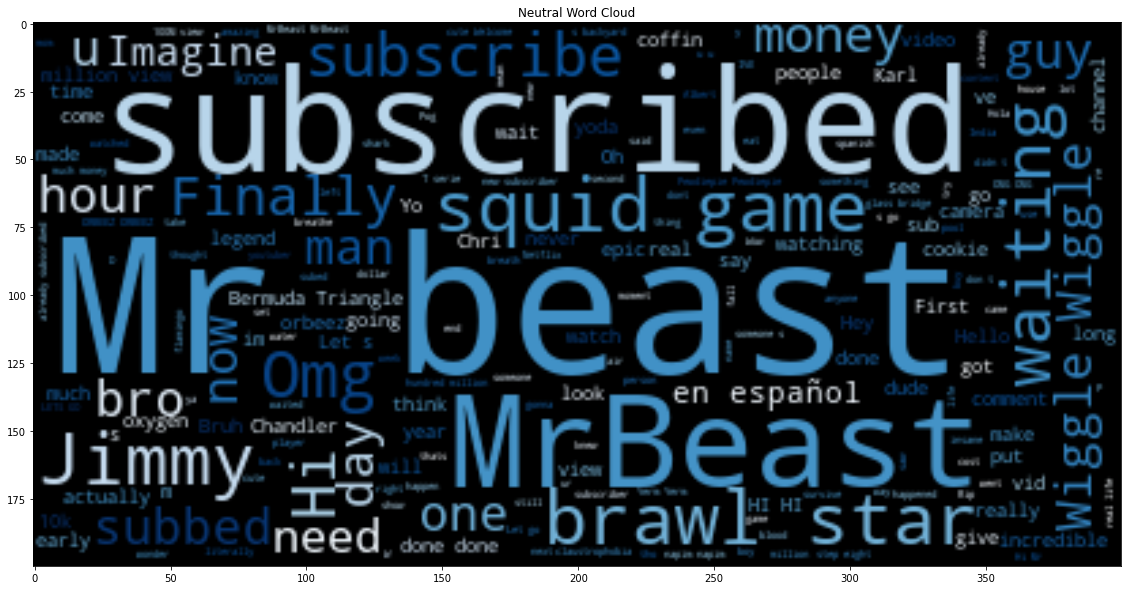

In [37]:
fig, axis = plt.subplots(1, 1, figsize=(20,10))
wordcloud = WordCloud(colormap="Blues").generate(neutral_comment)

plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Neutral Word Cloud')
plt.show()
fig.savefig('wordcloud-neutral.png')

# Mr Beast Most Popular Video vs Mr Beast Gaming Most Popular Video

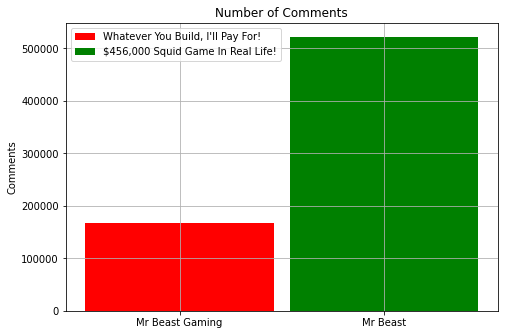

In [38]:
data = [[len(pay_for.Comment)], 
       [len(squid_game.Comment)]]

X = np.arange(1)
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'r', width = 0.23, label="Whatever You Build, I'll Pay For!")
ax.bar(X + 0.25, data[1], color = 'g', width = 0.23, label='$456,000 Squid Game In Real Life!')

# ax.axes.get_xaxis().set_visible(False)
ax.set_xticks([0, 0.25], ('Mr Beast Gaming', 'Mr Beast'))

ax.set_ylabel('Comments')
ax.set_title('Number of Comments')

plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [39]:
mr_beast_gamming_date = pd.to_datetime(pay_for.Time)
mr_beast_date = pd.to_datetime(squid_game.Time)

In [40]:
mr_beast_gamming_list =  list()
mr_beast_list = list()

for comment in mr_beast_gamming_date:
    mr_beast_gamming_list.append(comment.date().strftime("%Y:%m:%d"))
    
for comment in mr_beast_date:
    mr_beast_list.append(comment.date().strftime("%Y:%m:%d"))

In [41]:
mr_beast_gamming_comments = Counter(mr_beast_gamming_list)
mr_beast_comments = Counter(mr_beast_list)

In [42]:
mr_beast_df = pd.DataFrame({'Time': np.array(list(mr_beast_comments.keys())), 'Number':  np.array(list(mr_beast_comments.values()))})
mr_beast_gaming_df = pd.DataFrame({'Time': np.array(list(mr_beast_gamming_comments.keys())), 'Number':  np.array(list(mr_beast_gamming_comments.values()))})

In [43]:
mr_beast_df.Time = pd.to_datetime(mr_beast_df.Time, format='%Y:%m:%d')
mr_beast_gaming_df.Time = pd.to_datetime(mr_beast_gaming_df.Time, format='%Y:%m:%d')

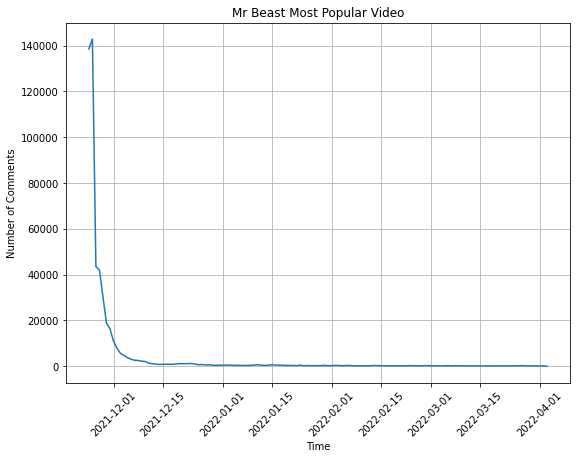

In [44]:
fig = plt.figure(figsize=(7,5))

ax = fig.add_axes([0,0,1,1])
ax = sns.lineplot(data=mr_beast_df, x='Time', y='Number')

plt.title("Mr Beast Most Popular Video")
plt.ylabel('Number of Comments')
plt.xlabel('Time')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

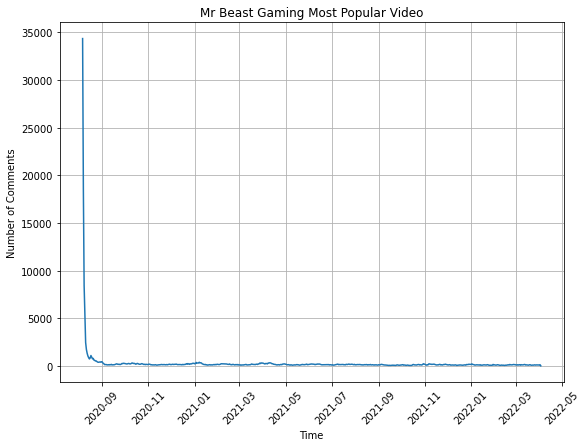

In [45]:
fig = plt.figure(figsize=(7,5))

ax = fig.add_axes([0,0,1,1])
ax = sns.lineplot(data=mr_beast_gaming_df, x='Time', y='Number')

plt.title("Mr Beast Gaming Most Popular Video")
plt.ylabel('Number of Comments')
plt.xlabel('Time')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

# First Comment Analysis

In [46]:
first_one = 0
first_two = 0
first_three = 0

comments = list()

for comment in squid_game.Comment:
    if 'first' in comment.lower() and (len(comment.split(' ')) < 4):
        first_one += 1
        comments.append(comment.lower())
        

for comment in burried.Comment:
    if 'first' in comment.lower() and (len(comment.split(' ')) < 4):
        first_two += 1
        comments.append(comment.lower())
        
for comment in golden.Comment:
    if 'first' in comment.lower() and (len(comment.split(' ')) < 4):
        first_three += 1
        comments.append(comment.lower())

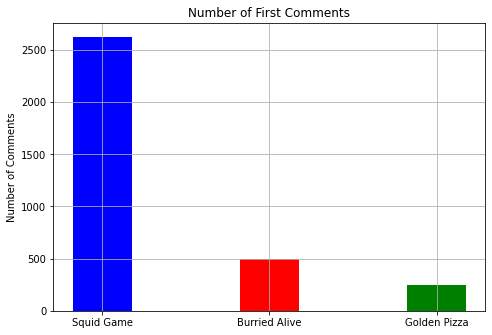

In [47]:
N = 3

first_comments = (first_one, first_two, first_three)

ind = np.arange(N)

width = 0.35

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(ind, first_comments, width, color=['b', 'r', 'g'])

ax.set_ylabel('Number of Comments')
ax.set_title('Number of First Comments')

ax.set_xticks(ind, ('Squid Game', 'Burried Alive', 'Golden Pizza'))
plt.grid(True)
plt.show()

# Mr Beast Squad - Chris Tyson, Karl Jacobs, and Chandler Hallow

In [48]:
chris_one = 0
chandler_one = 0
karl_one = 0

chris_two = 0
chandler_two = 0
karl_two = 0

chris_three = 0
chandler_three = 0
karl_three = 0

for comment in squid_game.Comment:
    if 'chris' in comment.lower():
        chris_one += 1
        
    if 'chandler' in comment.lower():
        chandler_one += 1
        
    if 'karl' in comment.lower():
        karl_one += 1

for comment in burried.Comment:
    if 'chris' in comment.lower():
        chris_two += 1
        
    if 'chandler' in comment.lower():
        chandler_two += 1
        
    if 'karl' in comment.lower():
        karl_two += 1
        
for comment in golden.Comment:
    if 'chris' in comment.lower():
        chris_three += 1
        
    if 'chandler' in comment.lower():
        chandler_three += 1
        
    if 'karl' in comment.lower():
        karl_three += 1

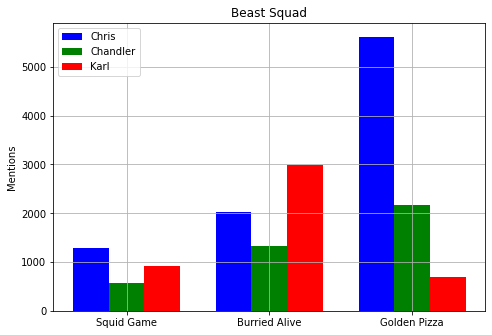

In [49]:
data = [[chris_one, chris_two, chris_three],
[chandler_one, chandler_two, chandler_three],
[karl_one, karl_two, karl_three]]

X = np.arange(3)
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='Chris')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='Chandler')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, label='Karl')

ax.set_ylabel('Mentions')
ax.set_title('Beast Squad')
ax.set_xticks([0.25, 1.25, 2.25], ('Squid Game', 'Burried Alive', 'Golden Pizza'))
plt.legend(loc="upper left")
plt.grid(True)
plt.show()